### L1 and L2 Regularization (Simplified Explanation):

Imagine you’re training for a marathon. You carry a backpack with supplies, but if the bag is too heavy (too many items), you won’t perform well. You need to reduce the weight (get rid of unnecessary items). 

In machine learning, **regularization** is like reducing the "weight" of your model to prevent it from becoming too complex or overfitting the data.

---

### **What is Regularization?**
Regularization is a technique to reduce overfitting by adding a penalty to the model’s complexity. It prevents the model from learning too much from the training data (overfitting) and improves its performance on unseen data.

---

### **L1 and L2 Regularization:**
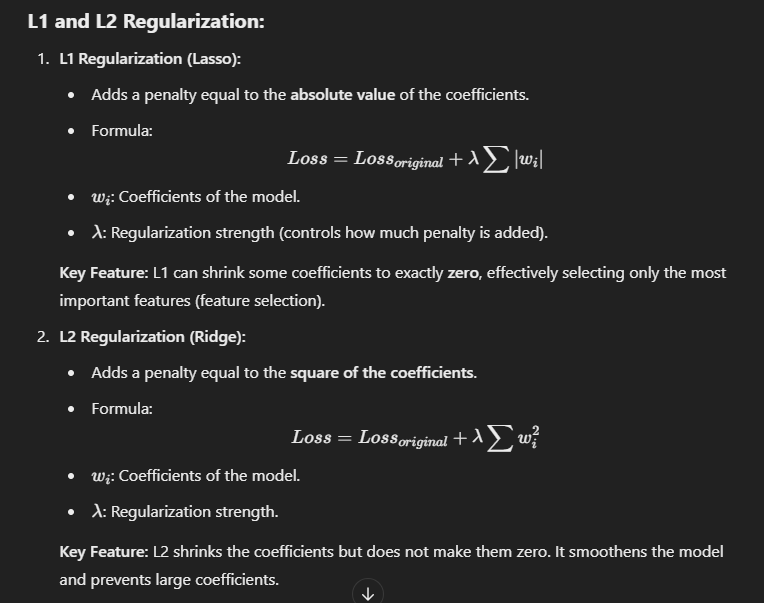
1. **L1 Regularization (Lasso):**
   - Adds a penalty equal to the **absolute value** of the coefficients.
   - Formula:
     \[
     Loss = Loss_{original} + \lambda \sum |w_i|
     \]
   - \( w_i \): Coefficients of the model.
   - \( \lambda \): Regularization strength (controls how much penalty is added).

   **Key Feature:** L1 can shrink some coefficients to exactly **zero**, effectively selecting only the most important features (feature selection).

2. **L2 Regularization (Ridge):**
   - Adds a penalty equal to the **square of the coefficients**.
   - Formula:
     \[
     Loss = Loss_{original} + \lambda \sum w_i^2
     \]
   - \( w_i \): Coefficients of the model.
   - \( \lambda \): Regularization strength.

   **Key Feature:** L2 shrinks the coefficients but does not make them zero. It smoothens the model and prevents large coefficients.

---

### **Differences Between L1 and L2:**

| **Aspect**            | **L1 Regularization (Lasso)**  | **L2 Regularization (Ridge)**  |
|------------------------|--------------------------------|--------------------------------|
| **Penalty Term**       | \( \sum |w_i| \)              | \( \sum w_i^2 \)              |
| **Effect on Coefficients** | Some become exactly 0 (sparse) | Shrinks but no zeros          |
| **Feature Selection**  | Yes (removes irrelevant features) | No (keeps all features)       |
| **Use Case**           | Sparse models, feature selection | Prevents large coefficients   |

---

### **Why Use Regularization?**
- **Avoid Overfitting:** Simplifies the model by reducing reliance on specific features.
- **Handle Multicollinearity:** Regularization works well when features are correlated.

---

### **Real-World Example:**
- **L1 Regularization:** Used when you have many features and want to select only the most important ones.
  - Example: Predicting house prices where only a few features (e.g., size, location) matter, while others (e.g., paint color) are irrelevant.
- **L2 Regularization:** Used when you want a stable model without completely removing any features.
  - Example: In ridge regression for stock price prediction.



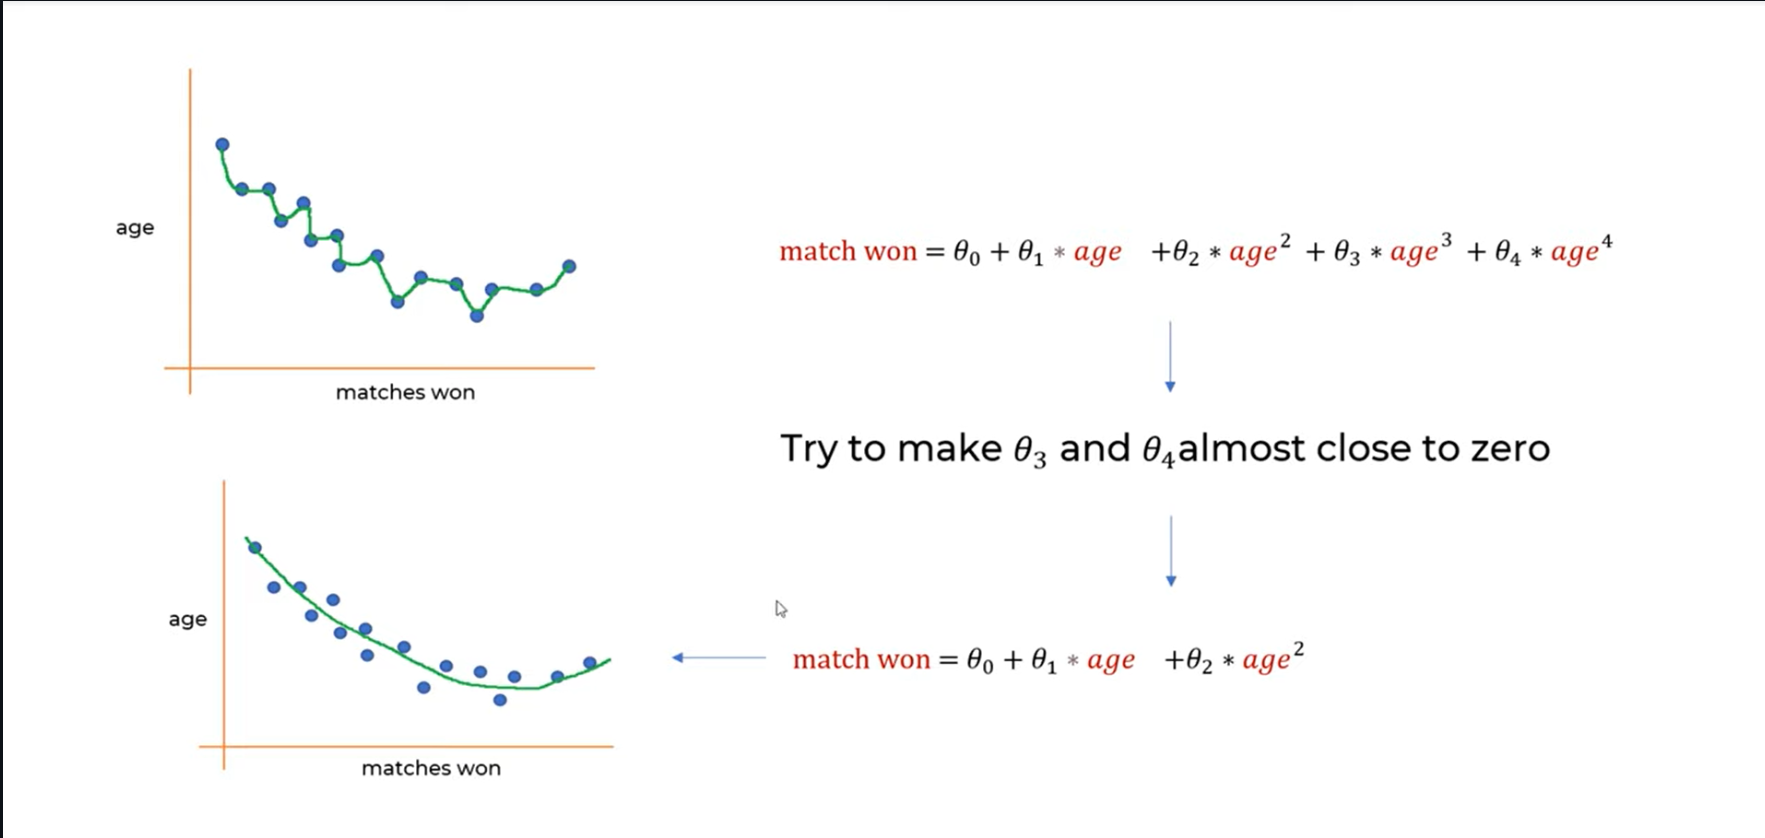
#### First line is not at all accurate and the second one is accurate but its zigzag so its too complex to the best fit is the third one
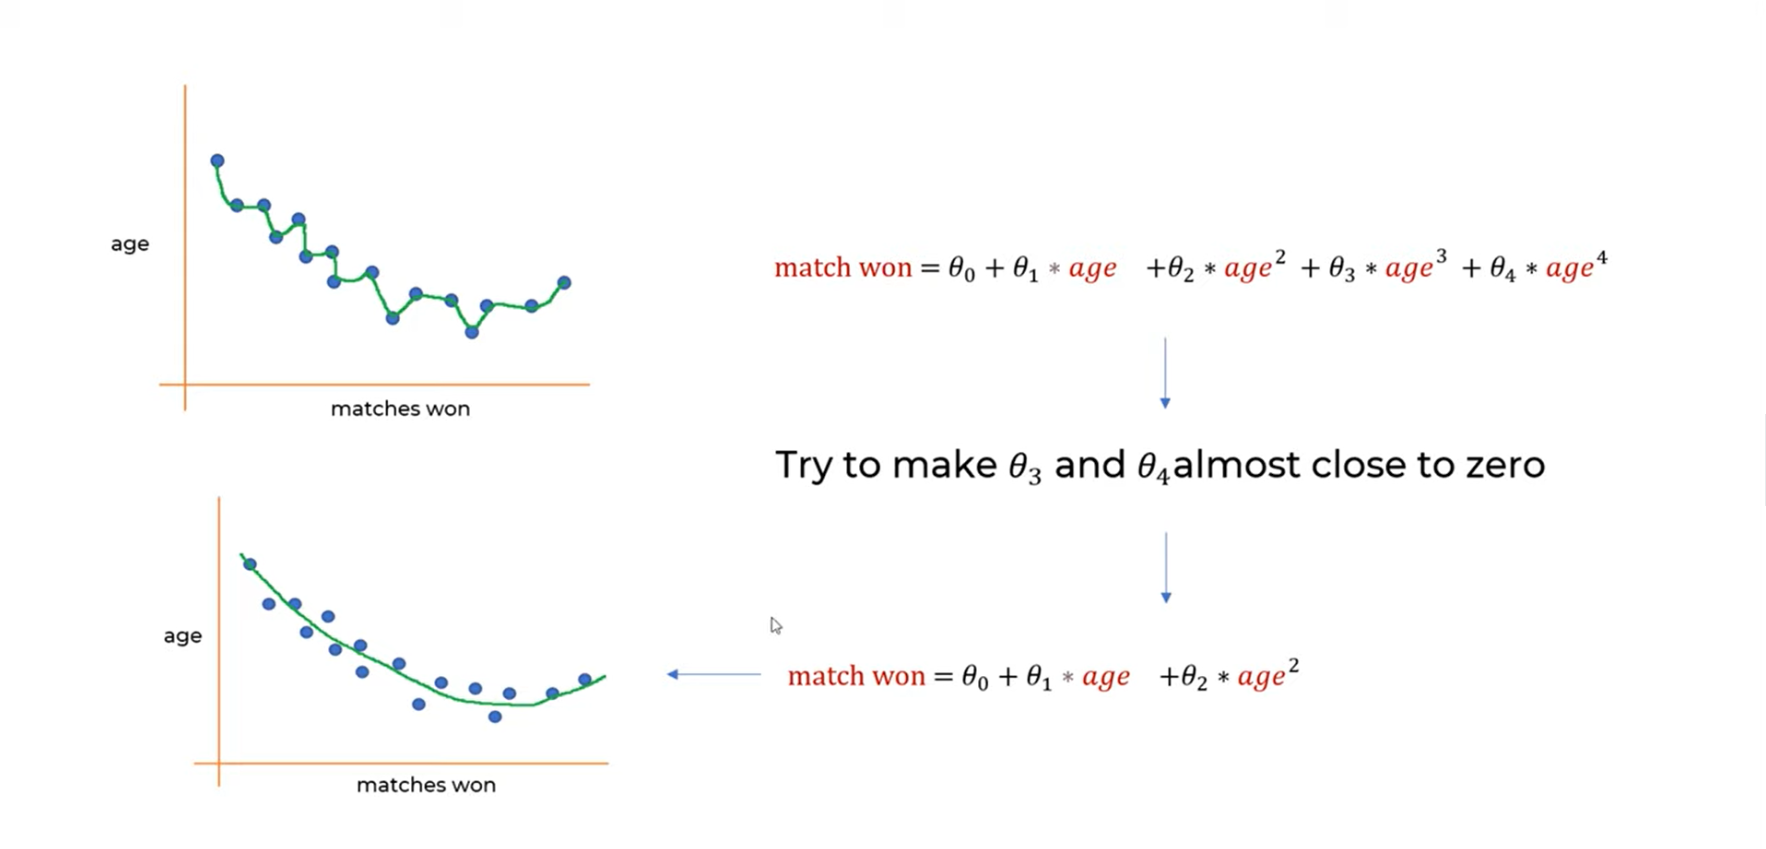
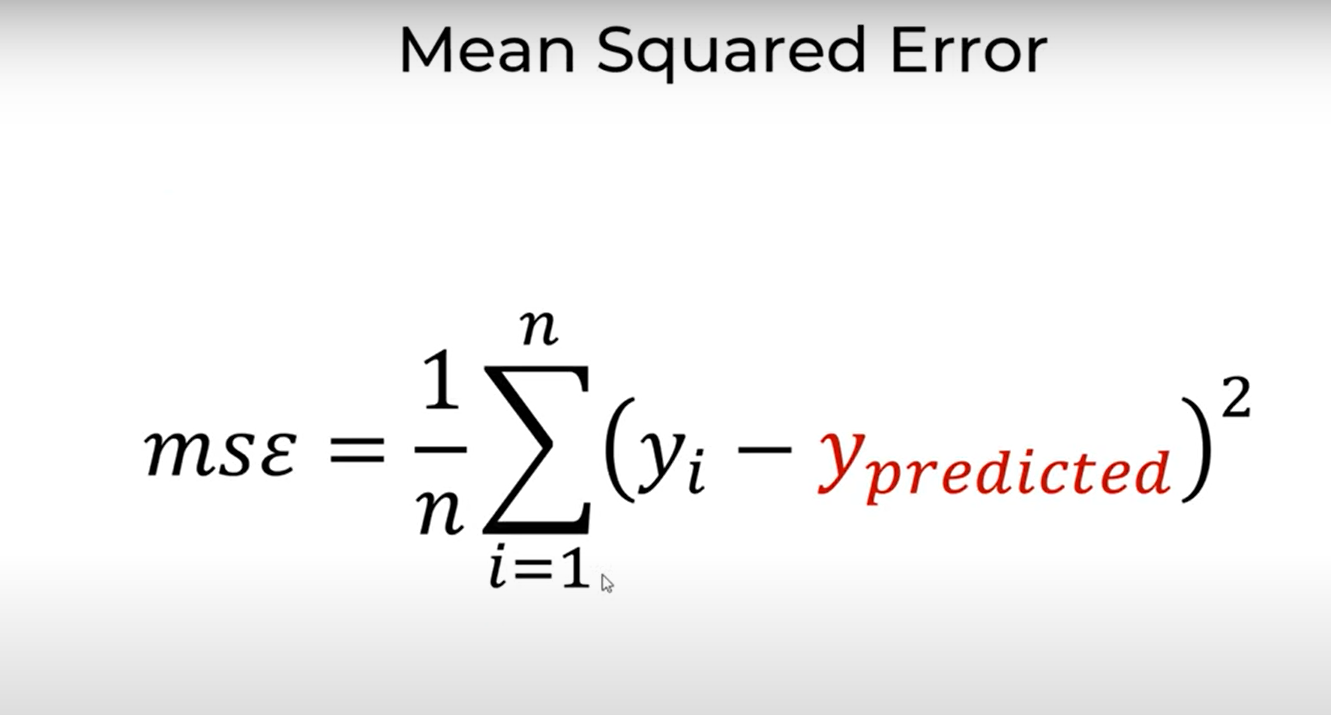
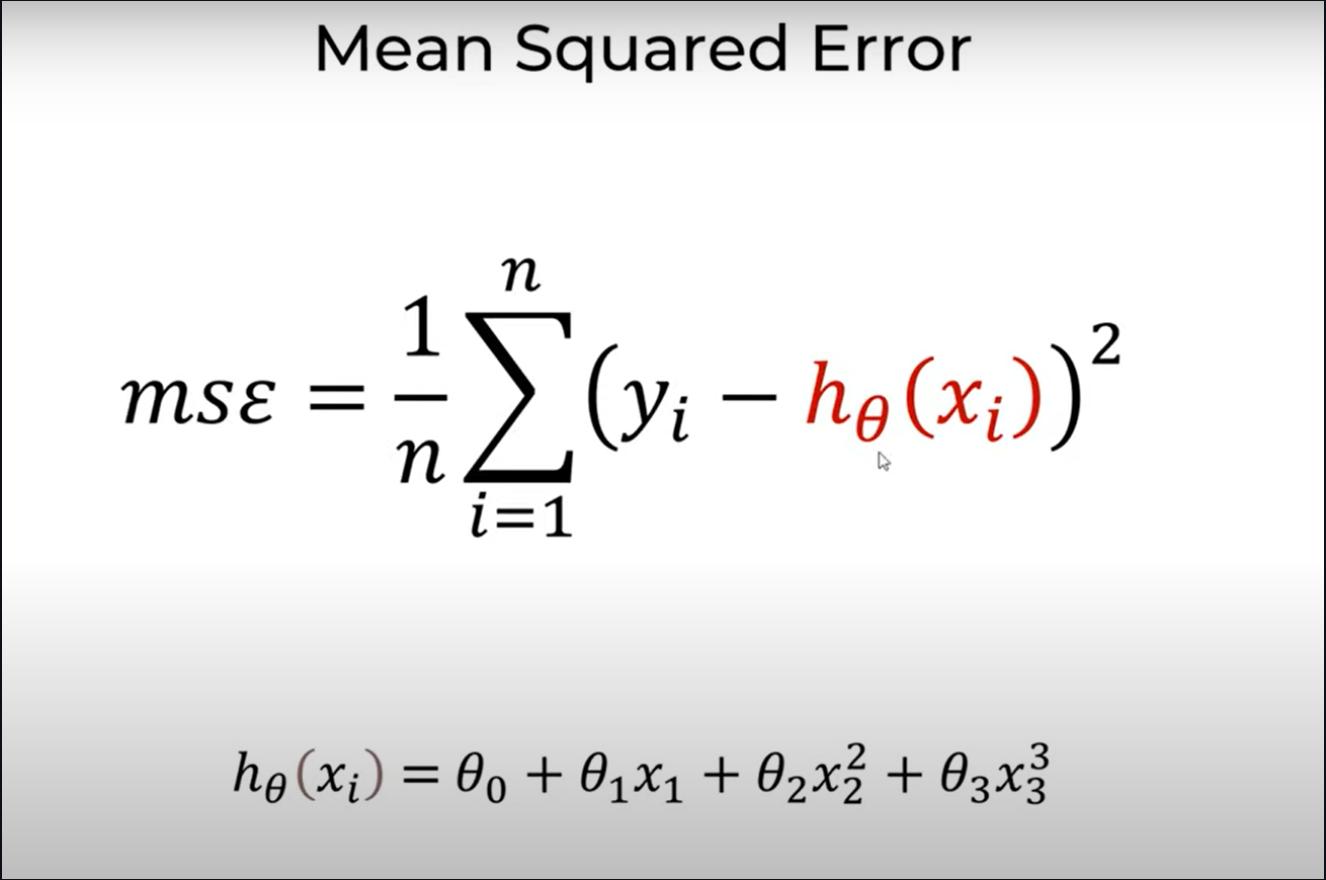
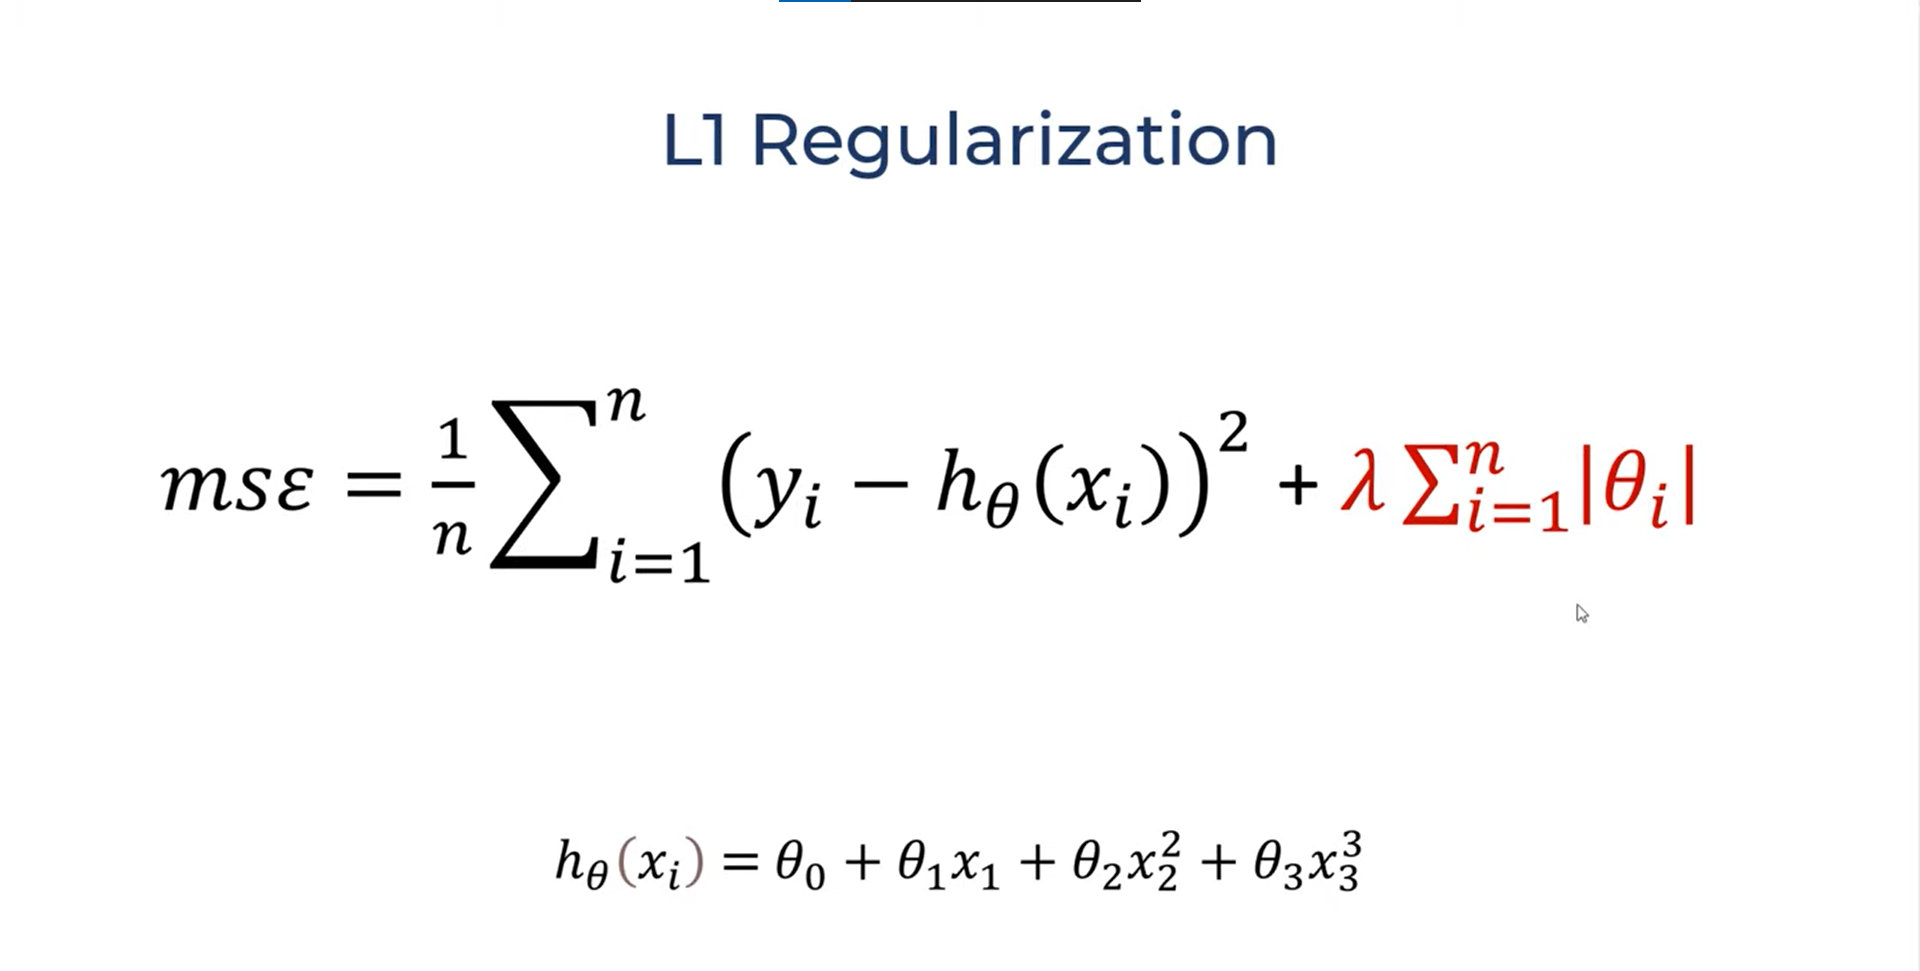
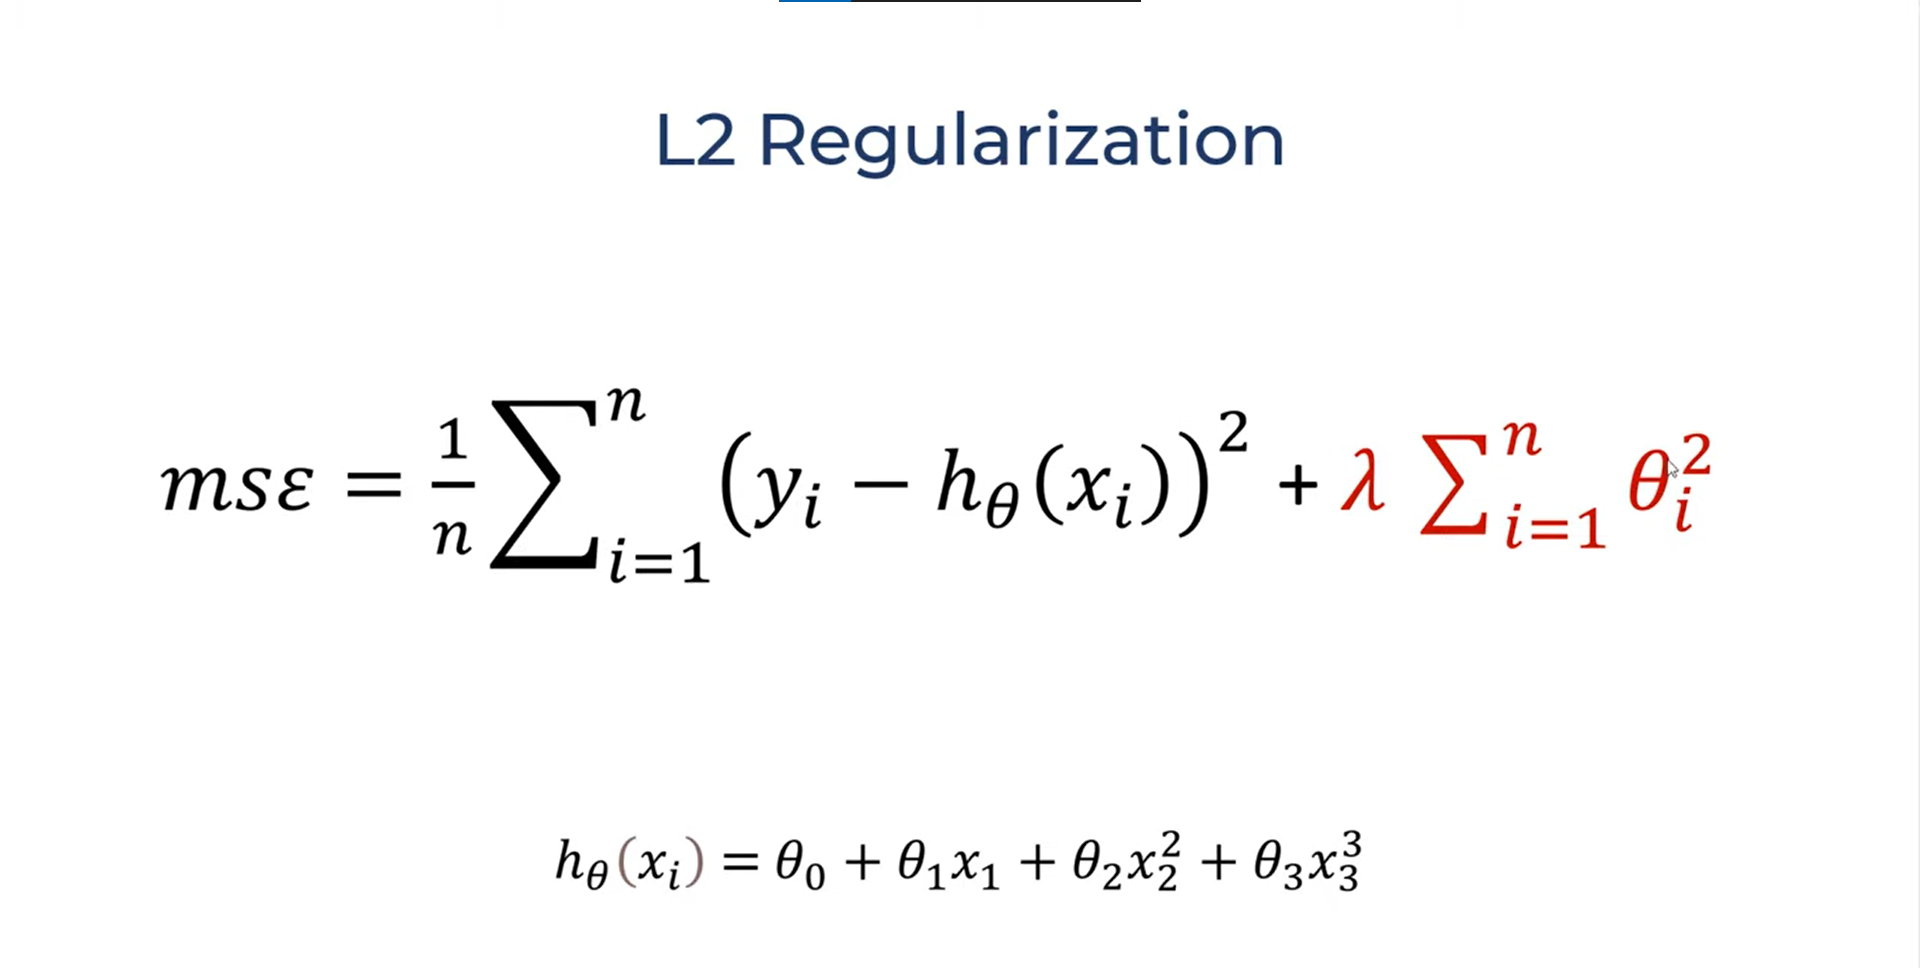
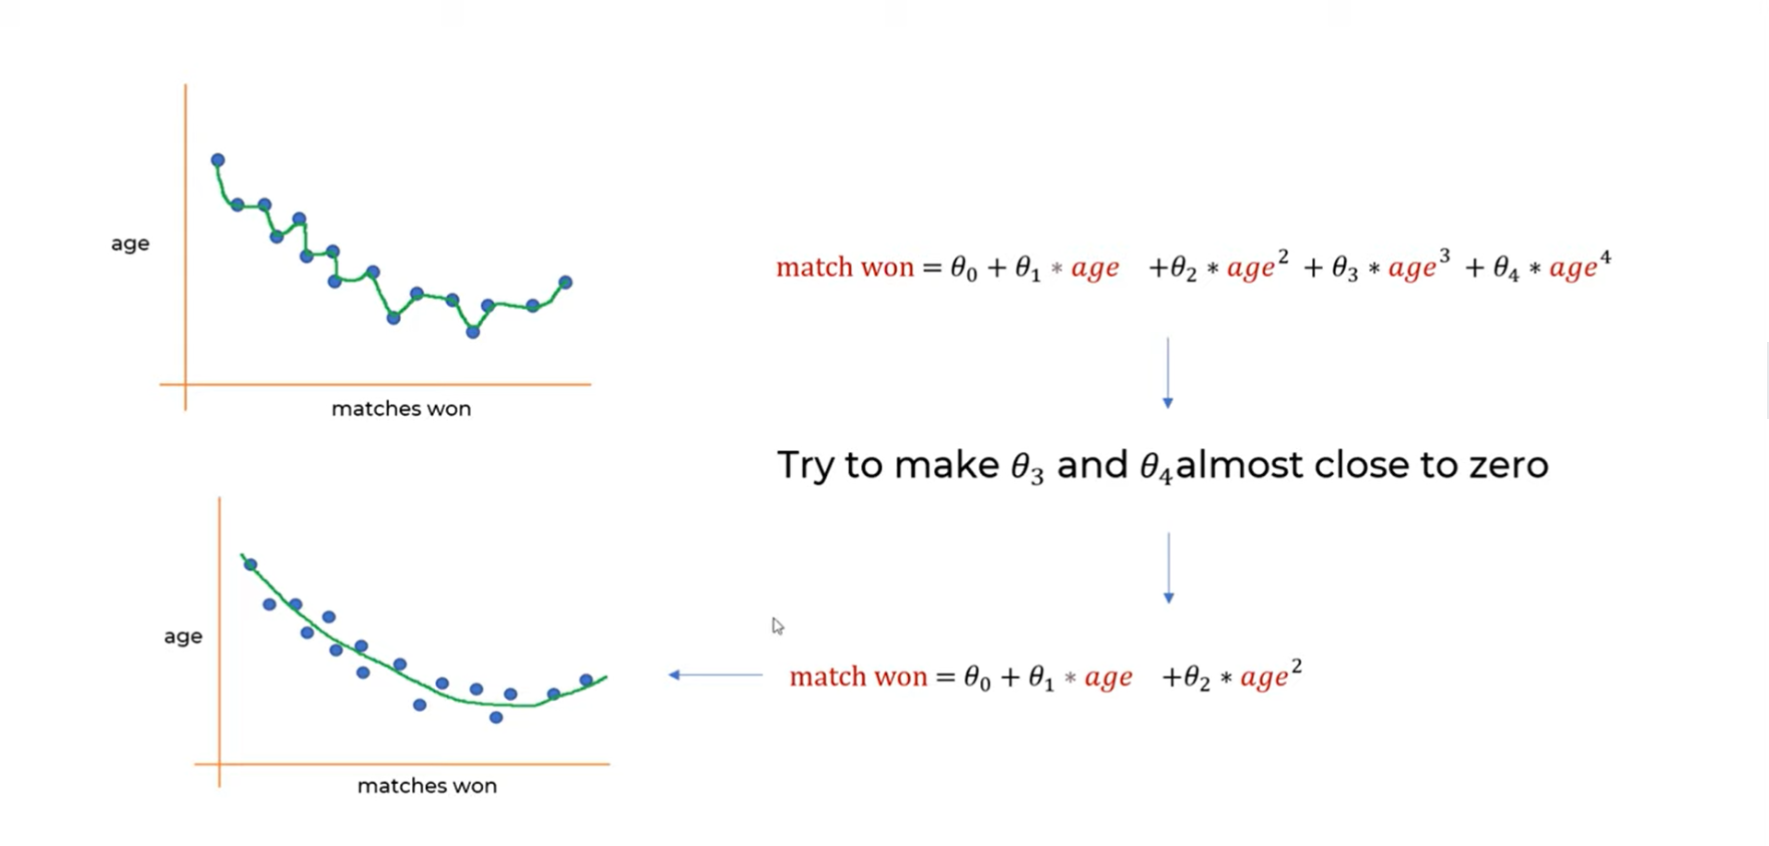

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
dataset = pd.read_csv("Melbourne_housing_FULL.csv")
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [2]:
warnings.filterwarnings('ignore')

In [3]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [4]:
dataset.shape

(34857, 21)

In [5]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',
'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset [cols_to_use]

In [6]:
dataset.head()


,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [7]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [8]:
cols_to_fill_zero = ['Propertycount','Distance','Bedroom2','Bathroom',"Car"]
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [9]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset['Landsize'].mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset['BuildingArea'].mean())

In [10]:
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [11]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [12]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,160.2564,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0000,1035000.0
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0000,1465000.0
5,Abbotsford,3,h,PI,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,94.0,160.2564,850000.0
6,Abbotsford,4,h,VB,Nelson,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,1.0,2.0,120.0,142.0000,1600000.0


In [13]:
dataset = pd.get_dummies(dataset,drop_first=True).astype(int)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019,2,2,1,1,202,160,1480000,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019,2,2,1,0,156,79,1035000,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019,2,3,2,0,134,150,1465000,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019,2,3,2,1,94,160,850000,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019,2,3,1,2,120,142,1600000,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
X = dataset.drop('Price',axis=1)
y1 = dataset['Price']

In [15]:
X.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Suburb_Aberfeldie,Suburb_Airport West,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019,2,2,1,1,202,160,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019,2,2,1,0,156,79,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019,2,3,2,0,134,150,0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019,2,3,2,1,94,160,0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019,2,3,1,2,120,142,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
y1.head()

1    1480000
2    1035000
4    1465000
5     850000
6    1600000
Name: Price, dtype: int32

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [19]:
reg.score(X_test,y_test)

0.6803420253597197

In [20]:
# Now we are going to use L1 regularization from scikit-learn library
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [21]:
lasso_reg.score(X_test,y_test)

0.6842223245939965

In [22]:
lasso_reg.score(X_train,y_train)

0.6732338292829279

In [23]:
# Now we will use L2 Regularization 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50,max_iter=100,tol=0.1).fit(X_train,y_train)

In [24]:
ridge_reg.score(X_test,y_test)

0.6764867285476912

In [27]:
# Now we will use L2 Regularization 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=20,max_iter=50,tol=0.1).fit(X_train,y_train)

In [28]:
ridge_reg.score(X_test,y_test)


0.68225254188456

In [29]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(Ridge(),{
    'alpha':[5,10,15,20,30,40],
    'max_iter':[50,100,150],
    'tol':[0.1,0.5,1,1.5]
})

In [30]:
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=Ridge(),
                   param_distributions={'alpha': [5, 10, 15, 20, 30, 40],
                                        'max_iter': [50, 100, 150],
                                        'tol': [0.1, 0.5, 1, 1.5]})

In [36]:
pd.DataFrame(clf.cv_results_)[['param_alpha','param_max_iter','param_tol','mean_test_score','rank_test_score']] # gives the result of the random search

,param_alpha,param_max_iter,param_tol,mean_test_score,rank_test_score
0,15,150,0.1,0.471246,3
1,30,50,1.0,0.460649,7
2,5,100,1.0,0.478942,1
3,15,50,1.0,0.471246,3
4,20,100,0.1,0.467547,5
5,20,150,0.1,0.467547,5
6,5,50,0.5,0.478942,1
7,30,50,0.1,0.460649,7
8,40,100,1.0,0.454375,10
9,30,50,1.5,0.460649,7
